### Instructions

When running the notebook the first time, make sure to run all cells before making changes in the notebook. Hit Shift + Enter to run the selected cell or, in the top menu, click on: `Kernel` > `Restart Kernel and Run All Cells...` to rerun the whole notebook. If you make any changes in a cell, rerun that cell.

If you make any changes in a coding cell, rerun the notebook by `Run` > `Run Selected Cell and All Below`

In [1]:
# Importing Python libraries and dependencies for our calculations
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)      # Ignore warnings
warnings.simplefilter(action='ignore', category=UserWarning)        # Ignore warnings
import time                              # Timing the runtime of the notebook
startTime = time.time()
import matplotlib.image as mpimg         # Matplotlib library for displaying images
from matplotlib import pyplot as plt     # Matplotlib library for plotting
import numpy as np                       # Numpy library for basic calculations
import scipy.integrate as si             # For integration
import scipy.optimize as so              # For finding the root of the gamma function
import scipy.special as ss               # For the gamma function
import sys;
sys.path.append('python/');
import components as comp
px = 1/plt.rcParams['figure.dpi']

# Bulge Rotation Curve

![A poster, reading: CHOOSE: EMPIRICAL OR THEORETICAL? Astrophysicists have developed models of the 'galactic bulge', the bright central component of spiral galaxies. Some of these models depend on empirical data sets as input, while more theoretical models only require empirically-derived parameters as input. Empirically-based models can be more accurate, however, purely-mathematical models can help us extrapolate, understand, and extend our knowledge beyond what can only be directly observed. When making your own bulge component, you'll get to choose your path: empirical or theoretical rotation curve models. CHOOSE: WHICH GALAXY? (End text) At the bottom of the poster, there are three labeled galaxy images. The first: NGC 5533, Constellation: BOOTES, DISTANCE: 177 MLY, SIZE: 50,000 LY. The second: NGC 891, CONSTELLATION: CAMELOPARDALIS, DISTANCE: 27.3 MLY, SIZE: 120,000 LY. The last: NGC 7814, CONSTELLATION: PEGASUS, DISTANCE: 40 MLY, SIZE: 80,000 LY.](images/bulge.png)

In [2]:
galaxy = "NGC891"         # Change this value to select a galaxy out of the 3 choices: NGC5533, NGC891, NGC7814

In [3]:
b = comp.galdict(galaxy)

After choosing a galaxy, restart the notebook by selecting `Kernel` > `Restart Kernel and Run All Cells` in the top bar. 

### Introduction

__What is a bulge?__ 
<br>A bulge is the bright central part of a spiral galaxy. In shape, bulges are ellipsoidal (spherically squished, to be scientific) and dense with stars, containing most of a spiral galaxy's visible matter.

### Equations

Calculate the rotational velocity due to stars in the bulge using the empirically derived bulge parameters.

>__Gamma function__: <br>
    \begin{equation}
    \gamma(b_n,2n) = \frac{1}{2} \Gamma(2n)
    \end{equation}<br>
    \begin{equation}
    r_e = b_n^n r_0 b_n 
    \end{equation}<br>
>__Luminosity in terms of central surface brightness__: <br>
    \begin{equation}
    I_0 = L_b \frac{(b_n)^{2n}}{2\pi n \ r^2_e \ \Gamma(2n)}
    \end{equation}<br>
    <br>
>where:<br>
        $I_0$ = central surface brightness<br>
        $L_b$ = luminosity of bulge <br>
        $n$ = concentration parameter<br> 
        $r_0$ = characteristic radius (related to $r_e$)<br>
        $r_e$ = effective radius<br>
        
>__Rotational Velocity__: <br>
    <font color="green">
    \begin{equation}
V_{B}^{2}(r) = C \int_{m=0}^{r} \left[\int_{\kappa=m}^{\infty} \frac {e^{-\left(\frac{\kappa}{r_0}\right)^{\frac{1}{n}}} \left(\frac{\kappa}{r_0}\right)^{\frac{1}{n}-1}} {\sqrt{\kappa^2-m^2}} d\kappa\right] \times \frac{m^{2}}{\sqrt{r^{2}-m^{2}e^{2}}} dm
    \end{equation}<br></font>
>where:<br>
    \begin{equation}
    C = \frac{4Gq\Upsilon_b I_0}{r_0n} \sqrt{sin^{2}i + \frac{1}{q^{2}} cos^{2}i}
    \end{equation}<br>
    \begin{equation}
    e = \sqrt{1-q^{2}}
    \end{equation}<br> 
        $\Upsilon_b$ = mass-to-light ratio<br>
        $e$ = eccentricity of the bulge<br>
        $q$ = intrinsic axis ratio<br> 
        $i$ = inclination angle<br> 
        $G$ = gravitational constant<br>

### Definitions of necessary bulge parameters

<b>Concentration parameter ($n$)</b> [unitless]: also known as the bulge Sersic parameter _"describes the curvature of the profile in a radius-magnitude plot"_ (Noordermeer 2008). <br>

<b>Intrinsic axis ratio ($q$)</b> [unitless]: _"q [is] the intrinsic axis ratio of the bulge isodensity surfaces"_ (Noordermeer 2008). This parameter describes how flat a galaxy appears. The eccentricity of the galaxy can be calculated using this parameter: $e$ = $\sqrt{1 - q^{2}}$.
<br>

<b>Inclination angle ($i$)</b> [degrees]: the angle of the galaxy from the horizontal. 

<b>Effective radius ($r_e$)</b> [kpc]: _"the radius which encompasses 50 percent of the light"_ within the bulge (Noordermeer 2008).<br>

<b>Luminosity ($L_b$)</b> [Lsun]: Total galactic luminosity of the bulge of the galaxy, in units of solar luminosity.<br>

<b>Mass-to-light ratio ($\Upsilon_b$)</b> [unitless]: the ratio of how much mass there is compared to how much it is visible. 

<b>Distance ($D$)</b> [Mpc]: the distance to the galaxy is useful when converting angular size to actual size. 

### Literature search

There are **five parameters** you will need to find to calculate the velocity of the bulge of your chosen galaxy: concentration parameter ($n$), intrinsic axis ratio ($q$), inclination angle ($i$), effective radius ($r_e$), luminosity of the bulge ($L_b$). In addition, you may also need to find the distance to the galaxy ($D$).

<div class="alert-info">Activity 1)</div>

>Do some research to find these parameters for any of the three galaxies (NGC 5533, NGC 891, NGC 7814) of your choice. This activity is intended to give you a glimpse into scholarly literature search. One place to start is by searching for your chosen galaxy at https://ui.adsabs.harvard.edu. You can also choose an entirely different galaxy and calculate the velocity of stars in its bulge. Make sure to have the right units for each parameter.

#### Concentration parameter [unitless]

In [4]:
#n = ?
n = b['bulge']['n']          # Import

#### Intrinsic axis ratio [unitless]

In [5]:
#q = ?
q = b['bulge']['q']

#### Inclination angle [degrees]

Inclination angle is usually given in degrees. We need to convert this to radians. 

In [6]:
#i_degrees = ?
i_degrees = b['i']

# Equation to convert degrees to radians
i_rad = i_degrees * (np.pi/180)

#### Effective radius [kpc]

In [7]:
#re_kpc = ?
re_kpc = b['bulge']['re_kpc']

The effective radius might be given in units of arcseconds. Arcsecond is a unit of an angle of how large something appears in the sky. In this case, you can use trigonometry to calculate the actual size. For this computation, find the distance to your galaxy to be able to convert from arcseconds to kiloparsec. <br>
If the effective radius is already in the right units (in kpc), comment out the next `Code` cell. 

Using a right triangle and a small angle approximation, convert arcseconds to kpc in the following way:

>__Getting the right units__: <br>
    \begin{equation}
    1 \rm \ arcsec = \frac{1^\circ}{3600} = \frac{\pi}{180^\circ} \times \frac{1^\circ}{3600} = \frac{\pi}{648000} \ radians
    \end{equation}
     <br>
    \begin{equation}
    1 \rm \ Mpc = 1000 \rm \ kpc
    \end{equation} <br>
>__Arcsec to kpc__: <br>
    \begin{equation}
    \tan (\theta) \approx \theta \approx \frac{S}{D}
    \end{equation} 
    <br>
    \begin{equation}
    S \rm \ (in \ kpc) \approx \theta \ (in \ rad) \times D \ (in \ kpc)
    \end{equation}
    <br>
where:<br>
        $\theta$ = angle the object appears in the sky<br>
        $S$ = actual size of the object<br> 
        $D$ = distance to the object<br>

In [8]:
### Converting the effective radius in arcsec to kpc (if needed). 
### If the conversion is not needed, comment out this section.

try:
    # Parameters found
    #re_arcsec = ?
    #D_Mpc = ?
    re_arcsec = b['bulge']['re_arcsec']
    D_Mpc = b['D_Mpc']

    re_rad = re_arcsec * (np.pi / (3600 * 180))      # arcsec to radians
    D_kpc = D_Mpc * 1000                             # Mpc to kpc
    re_kpc = re_rad * D_kpc           

    # Print value
except KeyError:
    re_kpc = b['bulge']['re_kpc']
print('The effective radius of ' + galaxy + ' is '+"{:.2f}".format(re_kpc)+' kpc')

The effective radius of NGC891 is 1.80 kpc


#### Luminosity of the bulge

In [9]:
#L = ?
Lb = b['bulge']['Lb']

In some cases, it is easier to find the absolute magnitude of the bulge rather than the luminosity. For example: The (R-band) absolute magnitude of the bulge ($M_b$) for NGC 5533 is listed in Source #2 (Noordermeer and Van Der Hulst, 2007), in Table A4 (Appendix) as -21.66.

Using the zero-point luminosity equation, calculate the luminosity of the bulge (in Watts):

>__Total luminosity of the bulge__: <br>
    \begin{equation}
    L_b = L_0 \times 10^{-0.4 M_b}
    \end{equation}
    <br>
>where:<br>
        $L_0 = 3.0128 \times 10^{28} W$ = zero-point luminosity<br>

In [10]:
#Mabs = ?
Mabs = b['Mabs']

In [11]:
### Converting absolute magnitude to luminosity (if needed). 
### If the conversion is not needed, comment out this section.

# Zero point luminosity in Watts
L0 = 3.0128e28 

# Solar luminosity in Watts
Lsun = 3.838e26         

# Equation to find the luminosity in Watts
L_Watts = L0 * 10**(-0.4 * Mabs)

# Convert Watts to Solar luminosity (assuming the solar luminosity is a constant)
# Convert units (Watts to Lsun)
Lb = L_Watts / Lsun

print("The total luminosity of the bulge is {:.3e} Lsun.".format(Lb))

The total luminosity of the bulge is 3.621e+10 Lsun.


#### Mass-to-light ratio

For simplicity, we are assuming a mass-to-light ratio of 1. However, this value can be found by fitting the total curve (that contains the bulge curve) to the measured values. You may also find this value during your literature search.

In [12]:
ML = 1        # Mass-to-light ratio of bulge [unitless] 

### Calculation

Calculate the velocity of the bulge using the equations discussed above. 

In [13]:
def v_bulge(r,L=Lb,re=re_kpc,n=n,q=q,i=i_rad,ML=ML):
    
    # Constant
    G = 4.300e-6       # Gravitational constant, [kpc*(km/s)**2/Msun]
    
    # Gamma function
    gammafunction = lambda x: ss.gammainc(2*n,x) * ss.gamma(2*n) - 0.5 * ss.gamma(2*n)
    bn = so.brentq(gammafunction,0,500000,
                 rtol=0.000001,maxiter=100)  # Comes within 1% of exact root within 100 iterations
    
    # Calculating I0
    I0 = L * bn**(2*n) / (2 * np.pi * n * re**2 * ss.gamma(2*n))    # Central surface brightness 
    
    # Calculating r0
    r0 = re / (bn**n)                                               # Characteristic radius (in kpc)

    # Integrand 1
    integrand1 = lambda x,m: np.exp(-np.power(x/r0,(1/n))) * np.power(x/r0,(1/n)-1) / (np.sqrt(x**2 - m**2))
    
    # Integrate integrand 1
    f_integrate1 = lambda m: si.quad(integrand1, m, np.inf, args=(m,))[0]
    f_vect1 = np.vectorize(f_integrate1)
    
    # Define C (constant)
    C = ((4 * G * q * ML * I0) / (r0 * n)) * (np.sqrt((np.sin(i_rad)**2) + (1/(q**2)) * (np.cos(i_rad)**2)))
    
    # Define eccentricity
    eccentricity = np.sqrt(1 - (q**2))  
    
    # Integrand 2
    f_integrate2 = lambda m,r: C * f_integrate1(m) * (m**2) / (np.sqrt((r**2) - ((m**2)*(eccentricity**2))))
    
    # Integrate outer function to get velocity squared
    vsq = lambda r: si.quad(f_integrate2, 0, r, args=(r,))[0]
    vsqv = np.vectorize(vsq)

    # Calculate velocity
    velocity = lambda r: np.sqrt(vsqv(r))
    
    return velocity(r)

In [14]:
# Define radius for plot
radius = np.linspace(0.01,20,100)

### Plot the velocity curve for the bulge

Note that this cell will probably take a few minutes to run. Please be patient.

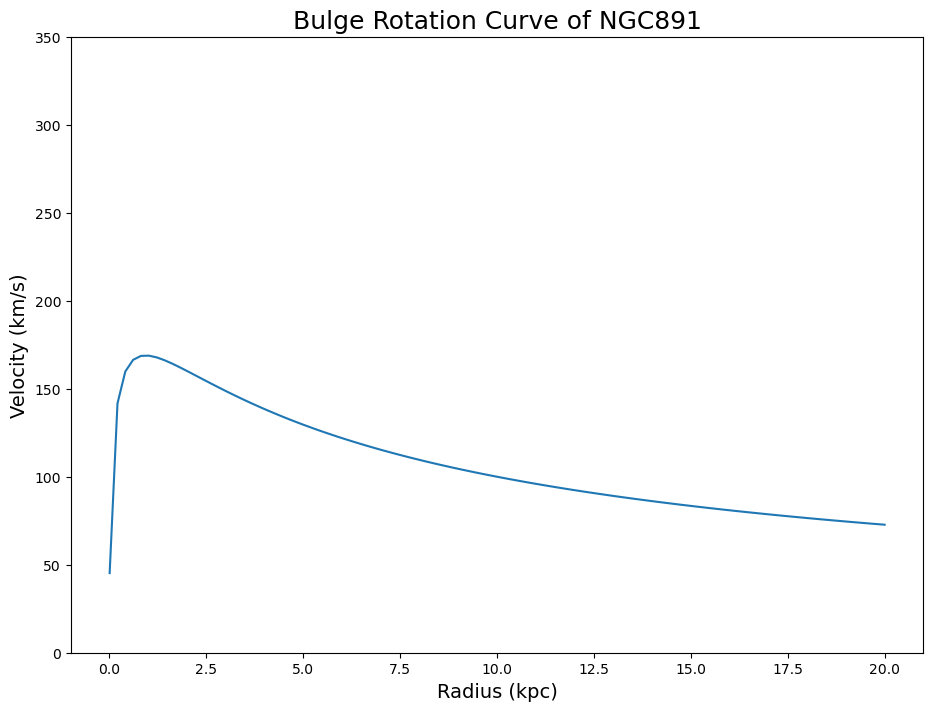

In [15]:
plt.figure(figsize=(1100*px,800*px))                                # Size of the plot
plt.plot(radius, v_bulge(radius), linestyle='solid')                # x and y values of the plot          
plt.title(str('Bulge Rotation Curve of ' + galaxy), fontsize=18)    # Title of the plot
plt.xlabel('Radius (kpc)', fontsize=14)                             # Labeling the x-axis
plt.ylabel('Velocity (km/s)', fontsize=14)                          # Labeling the y-axis
plt.ylim(0,350)                                                     # Changing the limit of the y-axis   
plt.show()

<div class="alert-info">Question 1)</div>

>Does the bulge have any effect on the rotation of the stars at 15 kpc?

<div class="alert-info">Question 2)</div>

>What effect does decreasing the concentration parameter, $n$, have on the rotation curve?

<div class="alert-info">Question 3)</div>

>How does the amplitude of the curve changes when increasing the mass-to-light ratio (ML or $\Upsilon_b$) of the bulge?

### References

>1. Noordermeer, Edo (October 22, 2008). **The Rotation Curves of Flattened Sérsic Bulges.** _Monthly Notices of the Royal Astronomical Society_ 385, no. 3: 1359–64. https://doi.org/10.1111/j.1365-2966.2008.12837.x. <br><br>
>2. Noordermeer, E., and J. M. Van Der Hulst. **The Stellar Mass Distribution in Early-Type Disc Galaxies: Surface Photometry and Bulge–Disc Decompositions.** _Monthly Notices of the Royal Astronomical Society_ 376, no. 4 (April 2007): 1480–1512. https://doi.org/10.1111/j.1365-2966.2007.11532.x. <br><br>
>3. Fraternali F, Sancisi R, Kamphuis P. **A tale of two galaxies: light and mass in NGC 891 and NGC 7814.** _Astronomy & Astrophysics_. 2011;531:A64. https://doi:10.1051/0004-6361/201116634. <br><br>
>4. Mamajek, E. E. et al. (October, 2015) **IAU 2015 Resolution B2 on Recommended Zero Points for the Absolute and Apparent Bolometric Magnitude Scales.** eprint arXiv:1510.06262. https://ui.adsabs.harvard.edu/abs/2015arXiv151006262M/abstract <br><br>
>5. Carroll, B. W.; Ostlie, D. A. (2006). **An Introduction to Modern Astrophysics (2nd ed.).** Pearson. pp. 60–62. ISBN 978-0-321-44284-0. <br><br>
>6. Graham, A. W. (2001). **An investigation into the prominence of spiral galaxy bulges.** The Astronomical Journal, 121(2), 820–840. https://doi.org/10.1086/318767 

In [16]:
#NBVAL_IGNORE_OUTPUT
#Because the timing won't be exactly the same each time.
executionTime = (time.time() - startTime)
print(f'Execution time: {executionTime:.2f} seconds')

Execution time: 158.19 seconds


### Literature search check

Did you research and locate the parameter values for your chosen galaxy? Click the 'Reveal!' button below to check your work! The results appear in the `Log Console` (select `View`--> `Show Log Console`). If you got any values wrong, you could refer to the citation by each value to see exactly which paper and table the value can be found in. 

In [17]:
from IPython.display import display
import ipywidgets as widgets

button = widgets.Button(description="Reveal!")
output = widgets.Output()
def on_button_clicked(x):
    with output:
        output.clear_output()
        print(str('Galaxy '+ galaxy +':'))
        try:
            if b['check'] == True:
                print(str('Concentration parameter, n = ' + "{:.1f}".format(n) + b['sources']['n']))
                print(str('Intrinsic axis ratio, q = ' + "{:.2f}".format(q) + b['sources']['q']))
                print(str('Inclination angle, i = ' + "{:.1f}".format(i_degrees) + b['sources']['i']))
                print(str('Effective radius, re = ' + "{:.1f} ".format(re_kpc) + b['sources']['re']))
                print(str('Luminosity of the bulge, L = ' + "{:.1e}".format(Lb) + b['sources']['re']))
                print(str('Distance, D = ' + "{:.1f}".format(b['D_Mpc']) + b['sources']['D']))
            elif b['check'] == False:
                print("Sorry, the parameters for your chosen galaxy are not in our library.")
        except KeyError: #aLso print this if the 'check' value was never added to the galaxy.
            print("Sorry, the parameters for your chosen galaxy are not in our library.")
        display()

In [18]:
button.on_click(on_button_clicked)
widgets.VBox([button,output])